[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NNDesignDeepLearning/NNDesignDeepLearning/blob/master/06.TensorFlowIntroChapter/Code/LabSolutions/TensorFlowIntroLab1_Solution.ipynb)

# TensorFlow Introduction Lab 1 -- Getting Started

This objective of this TensorFlow lab is to help you become familiar with the basics of using TensorFlow to load data, create multilayer networks, train the networks and display the results. If you haven't already done so, run the cells in the `TensorFlowIntroChapter.ipynb` Jupyter Notebook to prepare for this lab.

Some of the cells in this notebook are prefilled with working code. In addition, there will be cells with missing code (labeled `# TODO`), which you will need to complete. If you need additional cells, you can use the `Insert` menu at the top of the page.

## Loading Modules

We begin by loading some useful modules. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.data import Dataset
from tensorflow.keras import datasets

2024-12-28 14:20:49.597748: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 14:20:49.640722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 14:20:49.640755: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 14:20:49.640783: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 14:20:49.648651: I tensorflow/core/platform/cpu_feature_g

# Loading Data

For this lab we will use a famous data set -- MNIST. This is a large database of handwritten digits. It contains 60,000 training images and 10,000 testing images. Each image consists of arrays of 28x28 pixels. The original website for the data, which describes the dataset in detail, and records accuracies using various machine learning strategies, can be found [here](http://yann.lecun.com/exdb/mnist/). The data set can be accessed easily using `tensorflow.keras.datasets`, as illustrated in the next cell.

In [2]:
(p_train, t_train), (p_test, t_test) = datasets.mnist.load_data()

In the next cell, check the sizes of the arrays.

In [3]:
print(p_train.shape)
print(t_train.shape)
print(p_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Let's take a look at one of the input images in the training set.

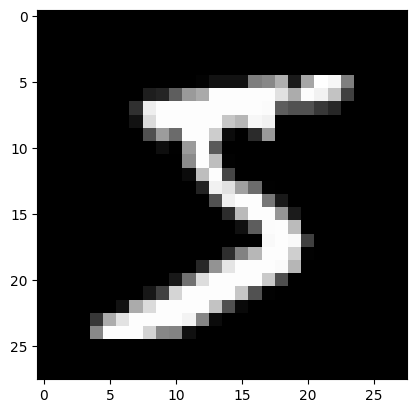

In [4]:
plt.imshow(p_train[0], cmap='gray')

What digit is this supposed to be? Check the corresponding target value in the next cell.

In [5]:
print(t_train[0])

5


The targets are represented as integers 0 through 9. We need to perform a one-hot encoding of the targets, so that they can be used for network training. Use the `to_categorical` method to do the conversion on training and testing targets.

In [6]:
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)

Check the conversion.

In [7]:
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


It is also useful to normalize the inputs. In this case, the maximum pixel values in the images is 255, so a simple normalization is to divide all inputs by 255.0, so that inputs will range from 0 to 1. Perform that normalization on the training and testing inputs in the next cell.

In [8]:
p_train = p_train/255.
p_test = p_test/255.

Put the training and testing data into two TensorFlow Datasets using `Dataset.from_tensor_slices()`.

In [9]:
train_dataset = Dataset.from_tensor_slices((p_train, t_train))
test_dataset = Dataset.from_tensor_slices((p_test, t_test))

I0000 00:00:1735343663.640158 1762327 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735343663.660115 1762327 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735343663.660243 1762327 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735343663.661094 1762327 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Group the data in the training and testing datasets into minibatches of size 100, using the `batch()` method.

In [10]:
train_dataset = train_dataset.batch(100)
test_dataset = test_dataset.batch(100)

# Constructing the Model

Now that the data is loaded, the next step is to construct the model. Create a method that uses the sequential class to construct a multilayer network with three layers and returns the constructed model. To begin, use 10 neurons in each layer. For the first two `Dense` layers, use the relu activation function, and use the softmax activation function in the third `Dense` layer. Note that because the training inputs are 28x28 arrays, we need to convert them to vectors before going into the first `Dense` layer. This can be done with `layers.Flatten()`. Make this the first component of the network.

In [11]:
def make_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

Use the method you just created to construct a model.

In [12]:
model1 = make_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


After constructing the model, you can display a summary with the `summary()` method.

In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Network

The first step in training the network is to compile the network. This assigns the training function and the performance (loss) function. Use `adam` as the training function and `categorical_crossentropy` as the loss function. When compiling, you can also specify that certain metrics be saved during training. Metrics are often measures of performance that are not explicitly optimized. Add `metrics=['accuracy']` to the compile step to save accuracy during training.

Compile the model.

In [14]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Now use `model.fit` to train the network.  Pass the training Dataset and assign epochs to 100.

In [15]:
history = model1.fit(train_dataset, epochs=100)

Epoch 1/100


I0000 00:00:1735343665.125066 1762412 service.cc:146] XLA service 0x7e06f4009dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735343665.125088 1762412 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000 Laptop GPU, Compute Capability 8.6
2024-12-27 18:54:25.138705: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-27 18:54:25.199256: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


233/600 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.3991 - loss: 1.7165

I0000 00:00:1735343665.600964 1762412 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.5821 - loss: 1.2633
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.8879 - loss: 0.3910
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.9120 - loss: 0.3090
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.9205 - loss: 0.2784
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9250 - loss: 0.2618
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.9280 - loss: 0.2504
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9299 - loss: 0.2411
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9329 - loss: 0.2330
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9348 - loss: 0.2265
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.9364 - loss: 0.2209
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9381 - loss: 0.2165
Epoch 12/100
600/600 ━━━━━━━━━━

Plot the training accuracy vs. epochs. The accuracy is stored in the `history.history` dictionary with key `'accuracy'`.

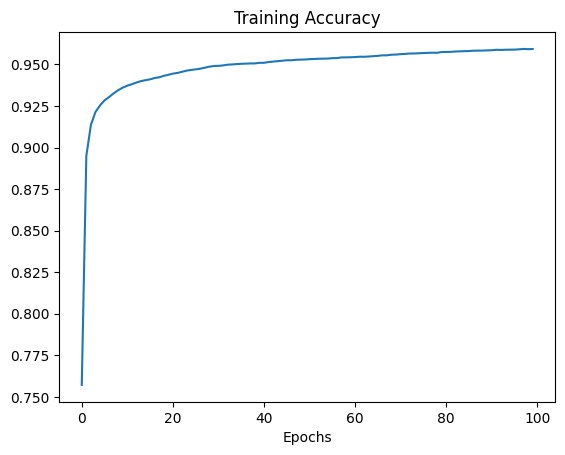

In [16]:
history_dict = history.history
acc = history_dict['accuracy']
epochs = history.epoch
plt.plot(epochs, acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.show()

# Evaluate the Trained Model

We can use the evaluate method on the testing data to see how well the model will generalize.

In [17]:
score = model1.evaluate(test_dataset, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.24712806940078735
Test accuracy: 0.9323999881744385


# Using Callbacks

When using the fit method, it is possible to assign **callbacks**, which perform certain opertions during the training process. You can find more about callbacks [here](https://keras.io/api/callbacks/) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks). 

You will remember from the Python Lab 1 that we built a learning rate method that updated the learning rate during the training process. We can do the same thing in TensorFlow using the `LearningRateScheduler` callback. 

First, let's define the same learning rate schedule class that we used in the Python Lab 1.

In [18]:
class lr_inc_dec:
    def __init__(self, lr_0=0.001, lr_0_steps=5, lr_max = 0.005, lr_max_steps = 5, lr_min=0.0005, lr_decay=0.9):
        self.lr_0         = lr_0
        self.lr_max       = lr_max
        self.lr_0_steps   = lr_0_steps
        self.lr_max_steps = lr_max_steps
        self.lr_min       = lr_min
        self.lr_decay     = lr_decay
        
    def __call__(self, epoch):
        if epoch < self.lr_0_steps:
            self.lr = self.lr_0 + (self.lr_max - self.lr_0)*epoch/self.lr_0_steps
        elif epoch < self.lr_0_steps + self.lr_max_steps:
            self.lr = self.lr_max
        else:
            self.lr = self.lr_min + (self.lr_max - self.lr_min)*self.lr_decay**(epoch - self.lr_0_steps - self.lr_max_steps)
 
        return self.lr

In [19]:
lr_scheduler = lr_inc_dec(lr_0=0.0005, lr_0_steps=10, lr_max = 0.002, lr_max_steps = 5, lr_min=0.001, lr_decay=0.95)

Now import the `LearningRateScheduler` from `tensorflow.keras.callbacks`.

In [20]:
from tensorflow.keras.callbacks import LearningRateScheduler

To access the scheduler during training, we add the following argument to the fit method: `callbacks=[]`, where inside the braces is a list of callbacks. In this case, there is only one callback, which should be `LearningRateScheduler(lr_scheduler, verbose=1)`. Here we have passed the scheduler we defined into the `LearningRateScheduler`. By using `verbose=1`, we can monitor the progress of the learning rate during training.

Make a new model.

In [21]:
model2 = make_model()

Compile the model, with the adam optimizer, categorical_crossentropy loss and accuracy metric.

In [22]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Train the model with the `fit` method for 100 epochs, and use the `LearningRateScheduler` callback.

In [23]:
history = model2.fit(train_dataset, epochs=100, callbacks=[LearningRateScheduler(lr_scheduler, verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.0005.
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.4092 - loss: 1.7453 - learning_rate: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00065.
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8629 - loss: 0.5172 - learning_rate: 6.5000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008.
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.8995 - loss: 0.3647 - learning_rate: 8.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009500000000000001.
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9113 - loss: 0.3194 - learning_rate: 9.5000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0011.
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.9193 - loss: 0.2949 - learning_rate: 0.0011

Epoch 6: LearningRateScheduler setting learning rate to 0.00125.
Epoch 6/100


Evaluate the new model on the test set.

In [24]:
score2 = model2.evaluate(test_dataset, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.24067164957523346
Test accuracy: 0.9380999803543091


# Experimenting With Architectures

Try different network architectures to see if you can improve the performance. To make this easier, modify the `make_model()` function so that you can vary the number of layers and the number of neurons in each layer. Pass a list into the function that has the number of neurons in each hidden layer. The last (`softmax`) layer always has 10 neurons.

In [25]:
def make_model(num_neurons):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for n in num_neurons:
        model.add(layers.Dense(n, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

Make a network with five hidden layers of 10 neurons, compile it with the `adam` optimizer, `categorical_crossentropy` loss and `accuracy` metric. Then train it with the default learning rate (no callbacks) for 100 epochs.

In [26]:
model3 = make_model([10]*5)
model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(train_dataset, epochs=100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.4068 - loss: 1.6524
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.7990 - loss: 0.6491
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8601 - loss: 0.4922
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8828 - loss: 0.4100
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8949 - loss: 0.3637
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9046 - loss: 0.3332
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9109 - loss: 0.3111
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9155 - loss: 0.2931
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9196 - loss: 0.2787
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9227 - loss: 0.2667
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.9258 - loss: 0.2556
Epoch 12/100
600/60

Plot the training accuracy vs epochs.

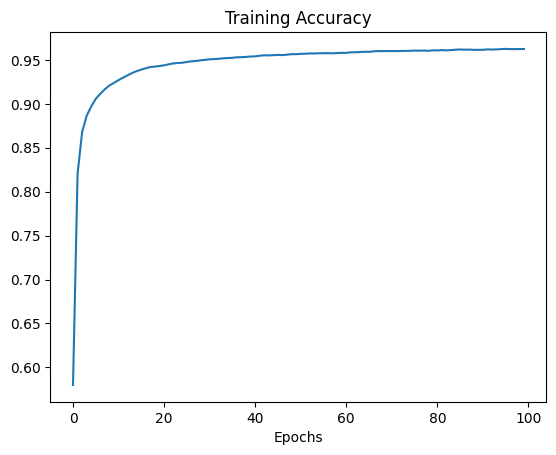

In [27]:
history_dict = history.history
acc = history_dict['accuracy']
epochs = history.epoch
plt.plot(epochs, acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.show()

Based on your plot, do you think the accuracy will increase, if you  train the network longer?

Now evaluate the model on the test set. 

In [28]:
score3 = model3.evaluate(test_dataset, verbose=0)
print("Test loss:", score3[0])
print("Test accuracy:", score3[1])

Test loss: 0.28688380122184753
Test accuracy: 0.9343000054359436


How does the test accuracy compare to the training accuracy? Is the network overfitting, or can you improve the accuracy by adding neurons or layers to the network?

## Explore Further

Experiment with different network architectures. Try to find the architecture that gives you the best accuracy. Investigate the following.

1. Increase the number of neurons in each layer. How do training and testing accuracy change?
1. Increase the number of layers. Does the training (testing) accuracy continue to decrease? How high can you make the testing accuracy? Do you get better results increasing the number of neurons in each layer, or the number of layers (assuming the overal number of weights stays the same)?
1. Train a network twice without changing the architecture. (Be sure to remake the network each time.) Do you acheive the same accuracy? If not, explain why the accuracy is different.
1. Experiment with different optimizers and different learning rates.
1. Experiment with different batch sizes.
1. Increase the number of epochs, and plot the training accuracy. Use the plot to determine whether or not you should  increase the number of epochs further.